In [1]:
#import dkistpkg_ct as DKISTanalysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from matplotlib import animation
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter
import cv2
from shapely import Polygon

import os

from astropy.modeling import models, fitting


# import sunpy.coordinates
# import sunpy.map
# from sunpy.net import Fido
# from sunpy.net import attrs as a

from astropy.io import fits

In [2]:
path = '/Users/coletamburri/Desktop/VBI_Destretching/'
folder_vbi = 'AXXJL' # 8 August X-class flare decay phase

In [3]:
dir_list = os.listdir(path+folder_vbi)

In [4]:
# below is for the VBI observations that have not yet been destretched/histogram matched
dir_list.sort()
dir_list.pop(0)
dir_list.pop(0)
dir_list[0]

img_file = fits.open(path+folder_vbi+'/'+dir_list[525])
img_file[1].header['DATE-BEG'][-15:-7]


img_file = fits.open(path+folder_vbi+'/'+dir_list[525])
frame = img_file[1].data[0]
fig,ax=plt.subplots(dpi=400)
ax.imshow(frame,cmap='grey')
ax.invert_yaxis()


IndexError: list index out of range

In [ ]:
dir_list[1]

In [8]:
# for those that have been destretched/histogram_matched

fullhalpha = fits.open(path+folder_vbi+'/'+dir_list[1])


In [18]:
!jupyter labextension update --all

(Deprecated) Updating extensions with the jupyter labextension update command is now deprecated and will be removed in a future major version of JupyterLab.

Users should manage prebuilt extensions with package managers like pip and conda, and extension authors are encouraged to distribute their extensions as prebuilt packages 


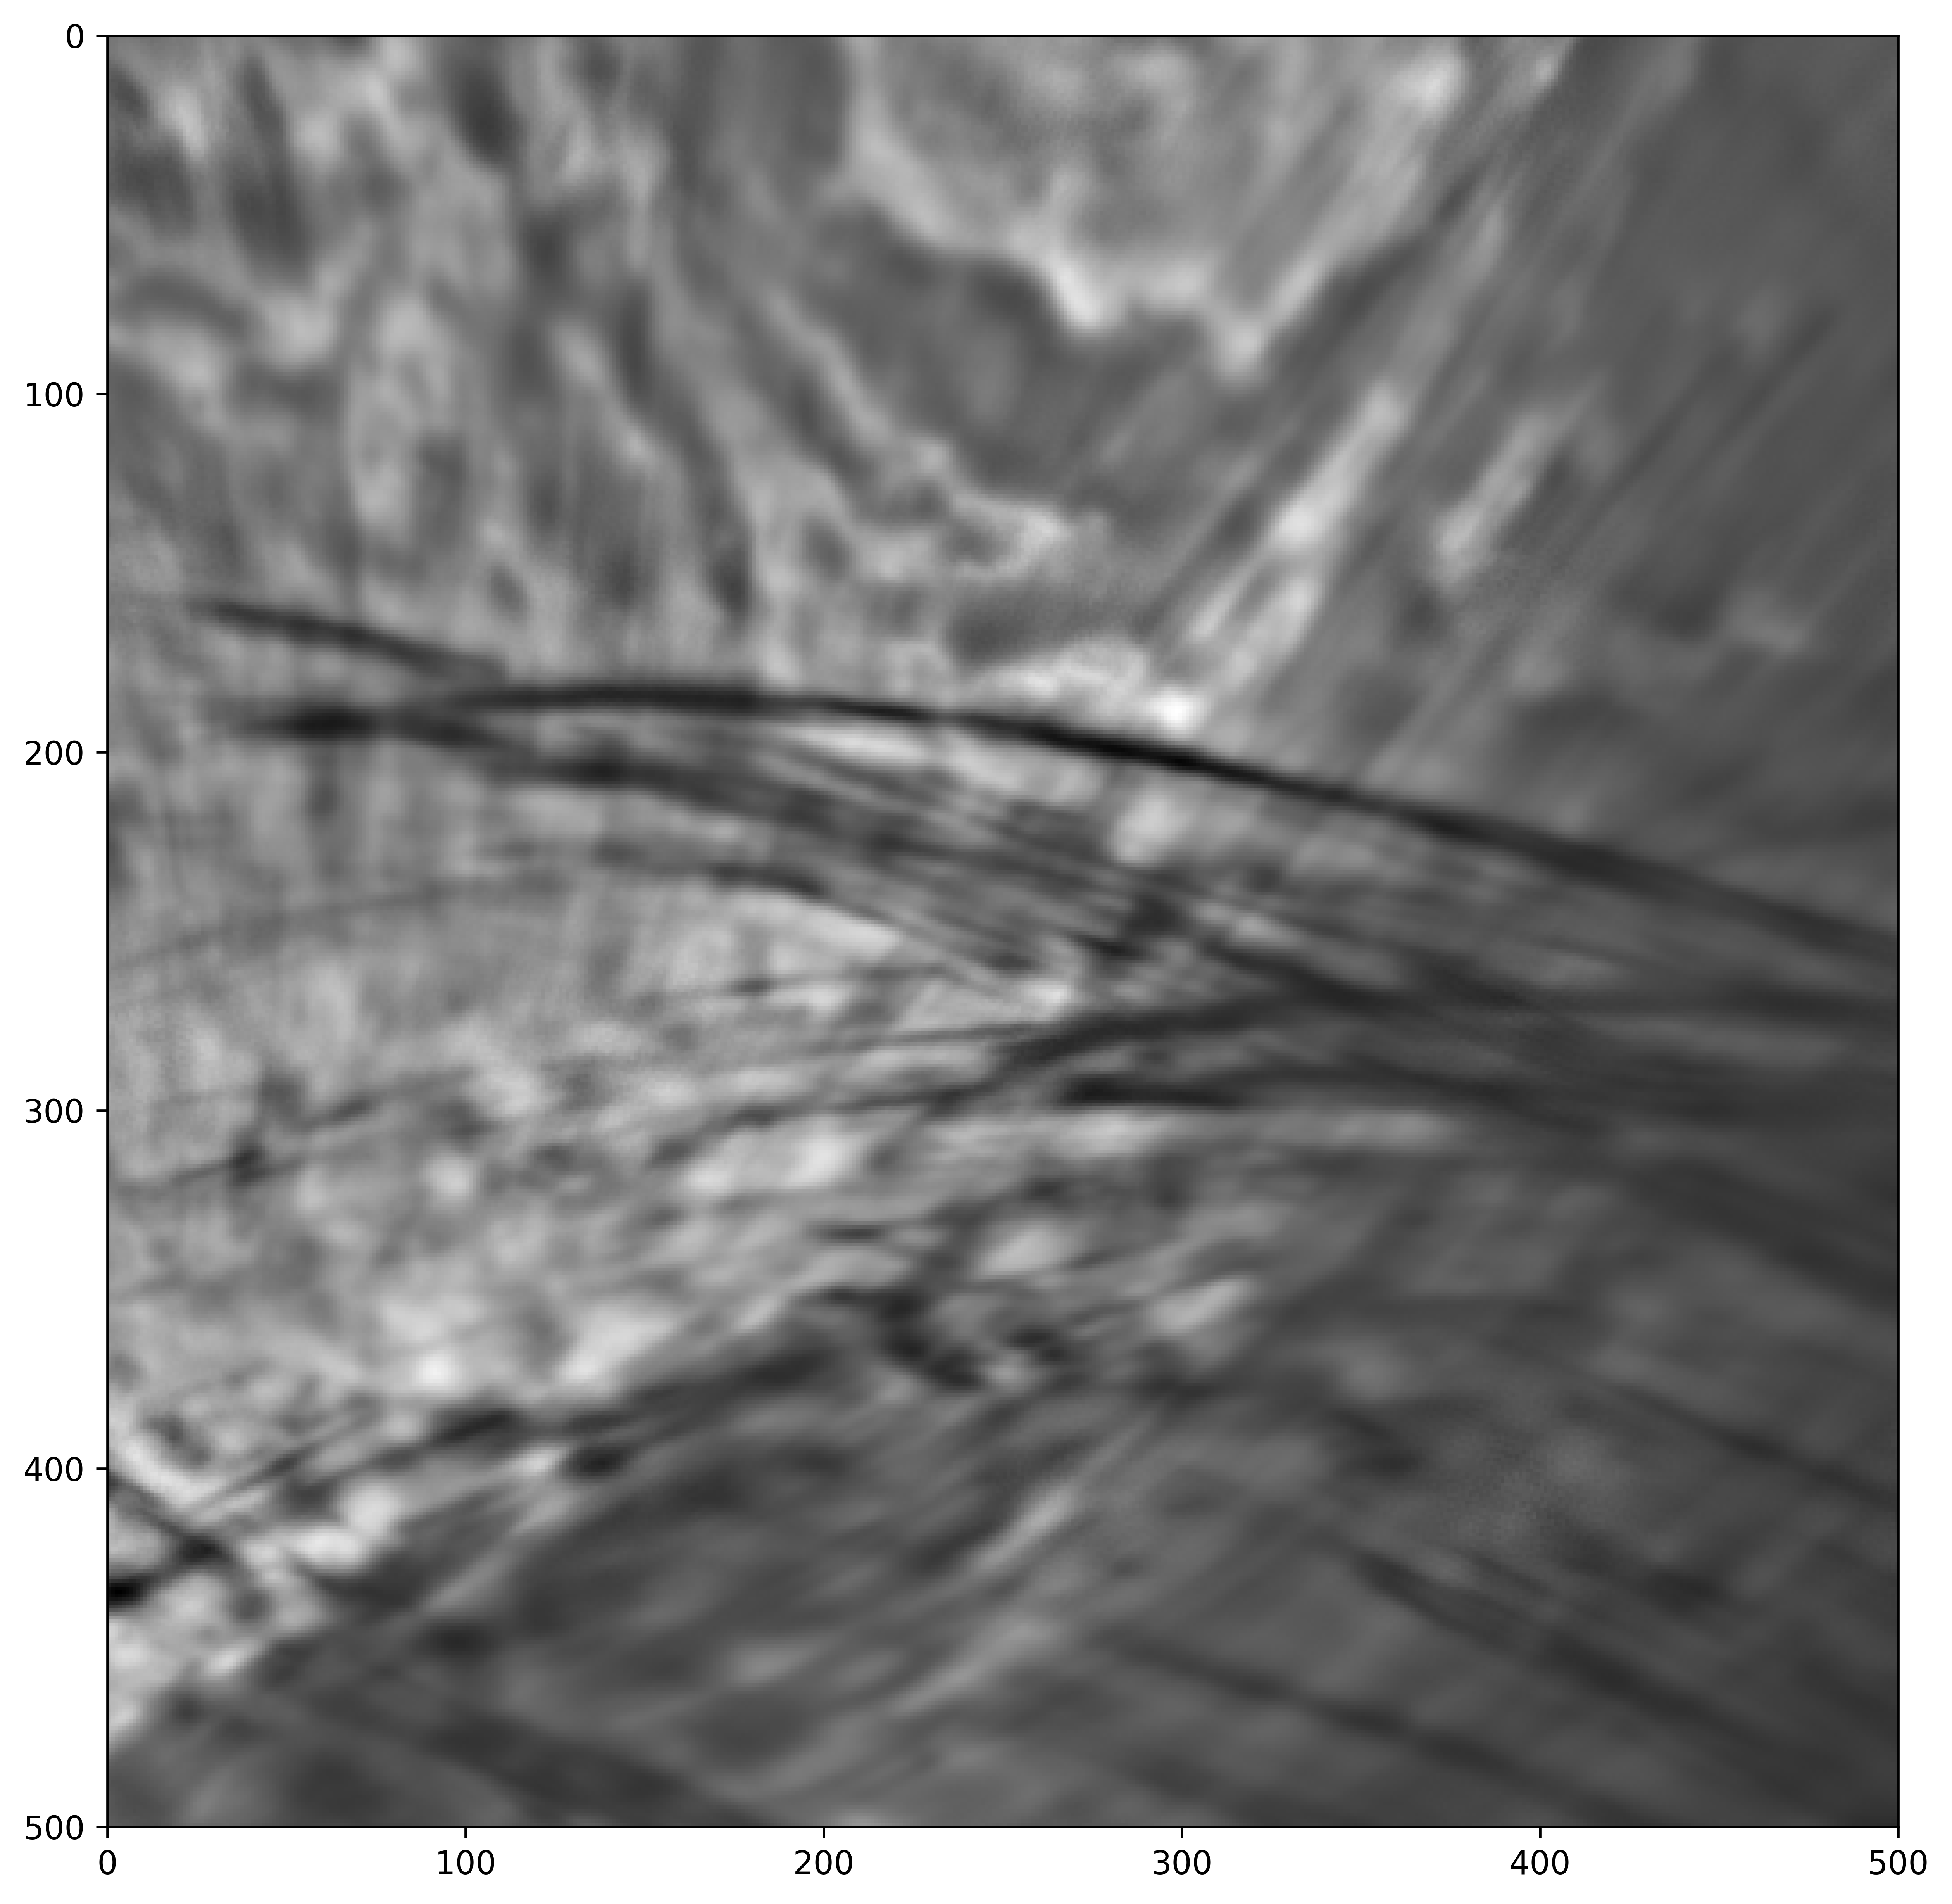

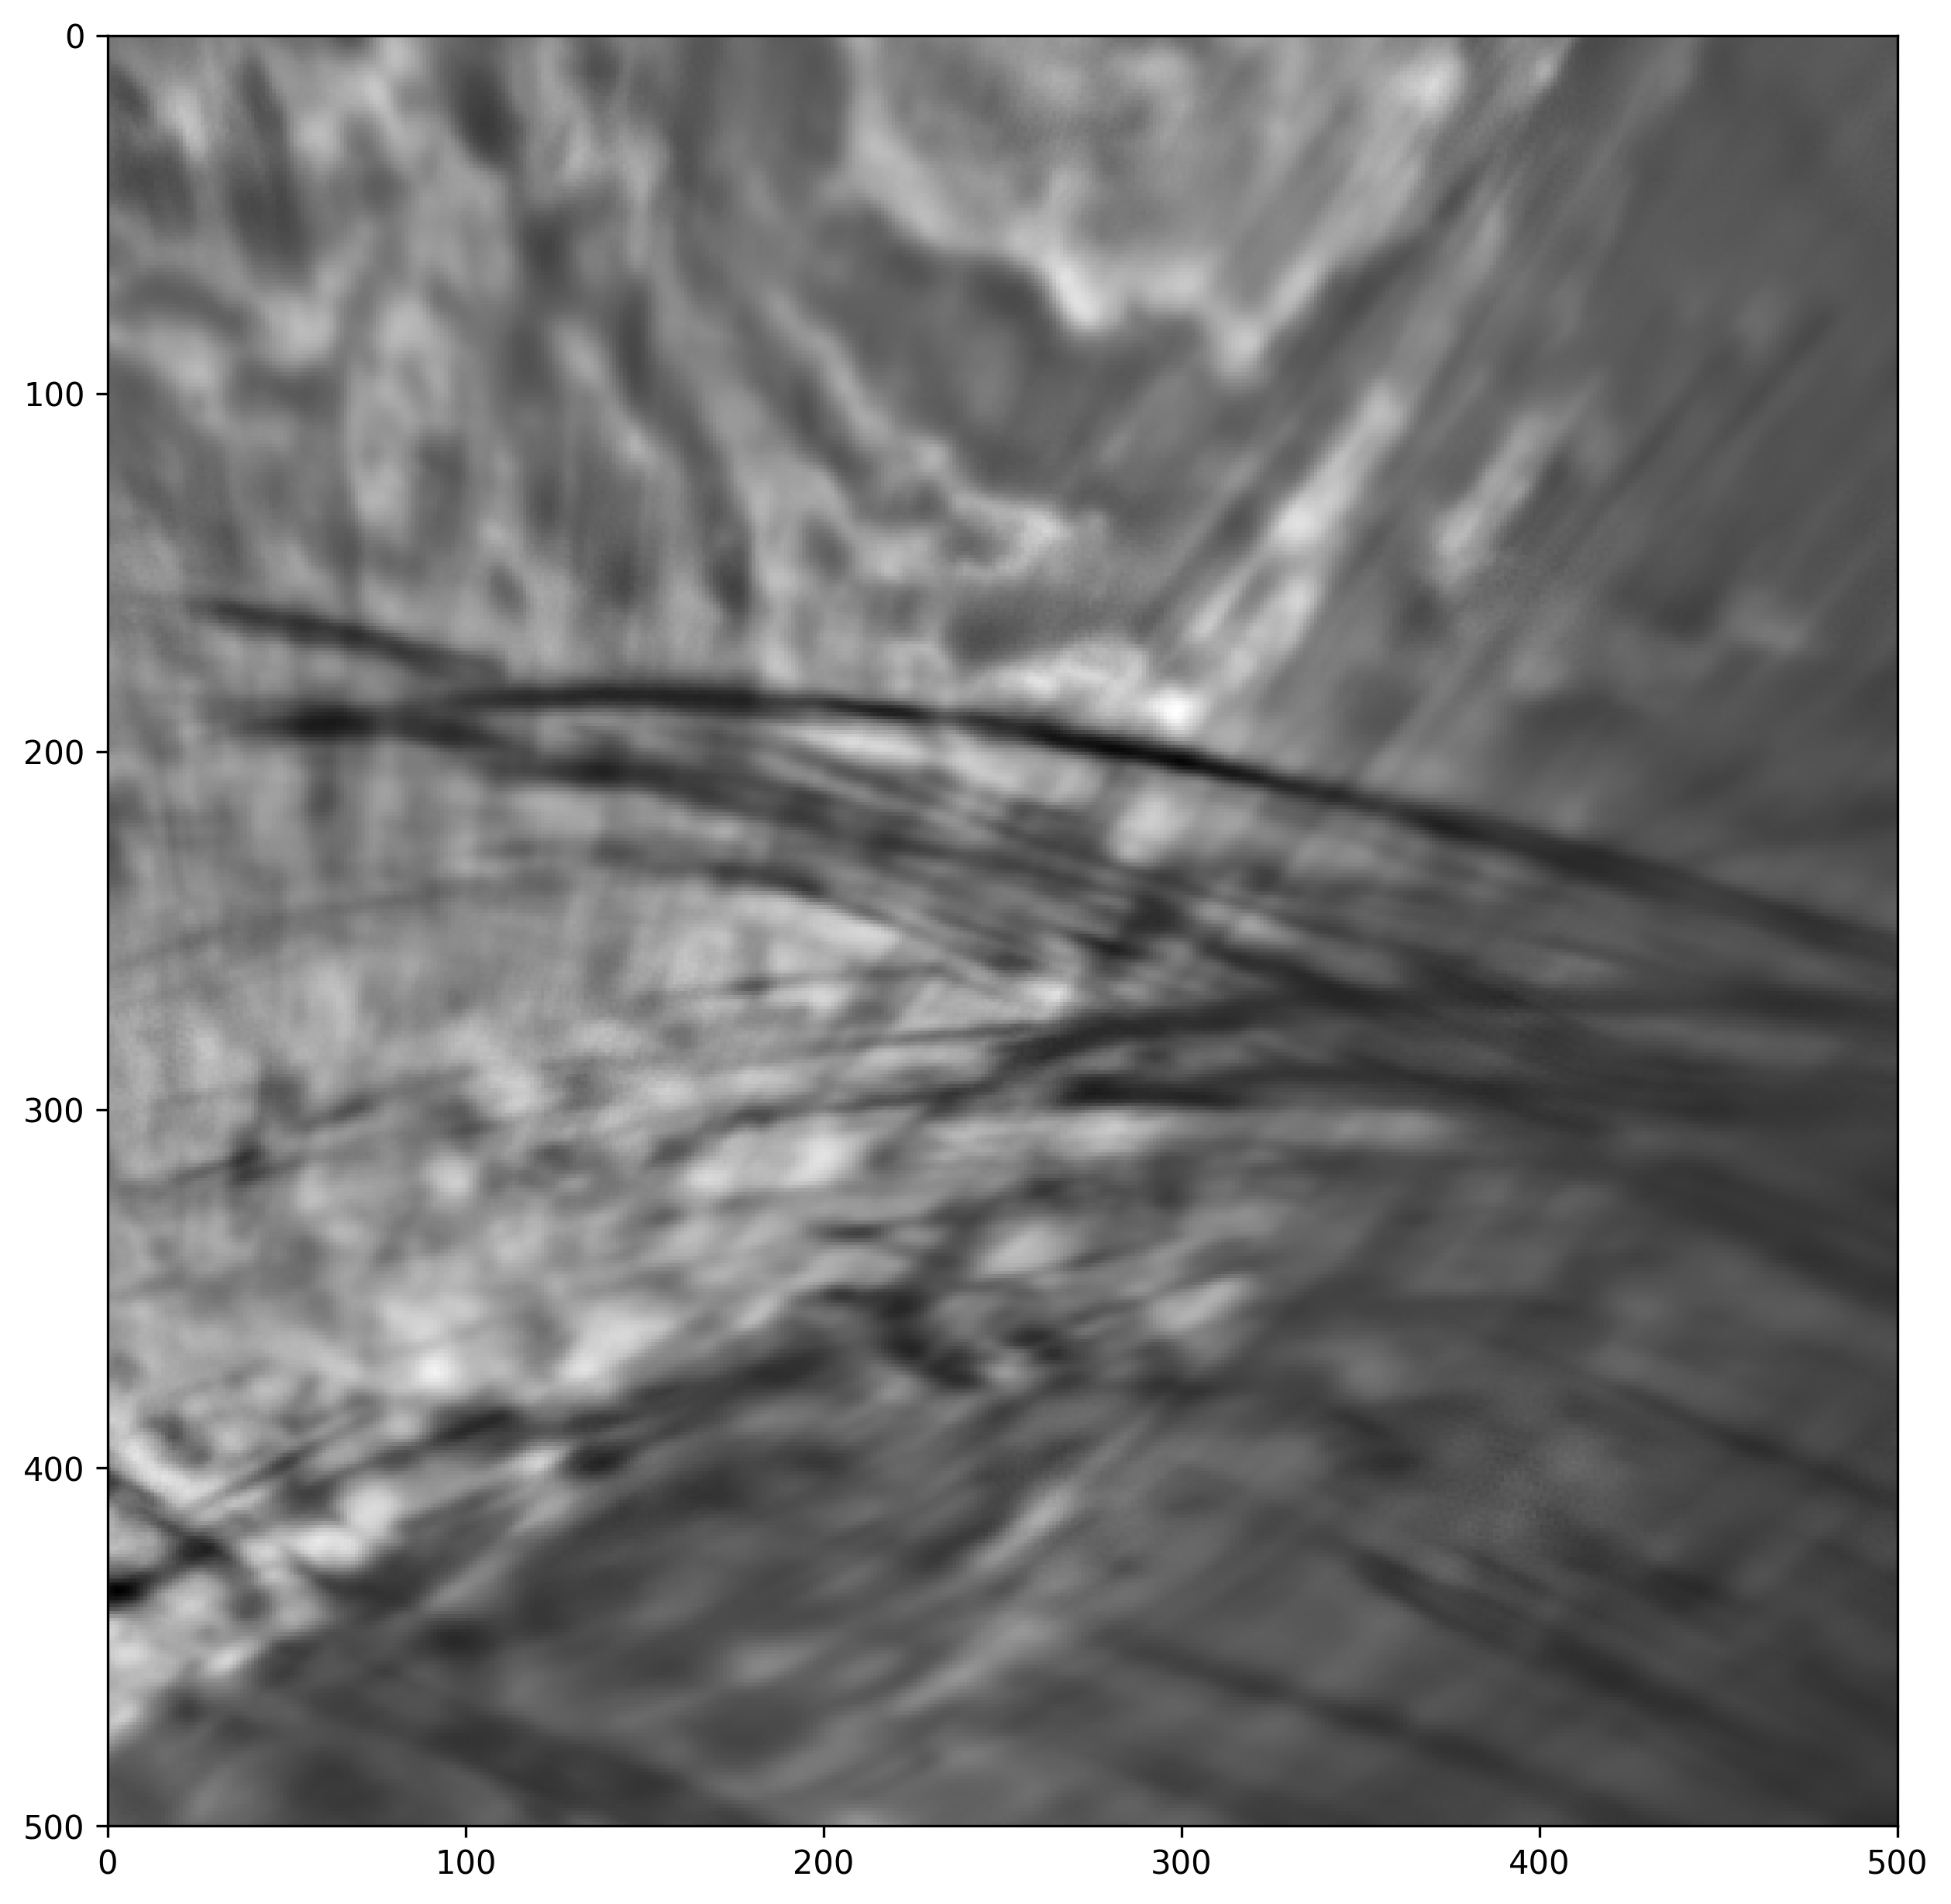

In [38]:
%matplotlib inline
first_frame = fullhalpha[0].data[0,:,:]

fig,ax=plt.subplots(dpi=300,figsize=(10,10))
ax.pcolormesh(first_frame[1000:1500,500:1000],cmap='grey')
ax.set_aspect('equal')
ax.invert_yaxis()

testing inline
Using: module://matplotlib_inline.backend_inline


In [30]:
%matplotlib inline

In [54]:
xarr = np.arange(np.shape(first_frame)[0])
yarr = np.arange(np.shape(first_frame)[1])

spatial_samp = 0.017 # for vbi red at 656nm

xarr_km = xarr*spatial_samp
yarr_km = yarr*spatial_samp

In [56]:
XKM,YKM =np.meshgrid(xarr_km,yarr_km)

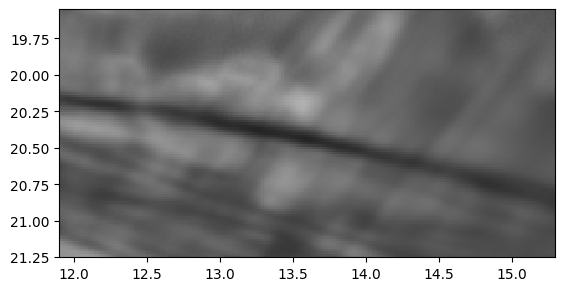

In [82]:
fig,ax=plt.subplots()
ax.pcolormesh(XKM,YKM,first_frame,cmap='grey')
ax.set_ylim([yarr_km[1150],yarr_km[1250]])
ax.set_xlim([xarr_km[700],xarr_km[900]])
ax.invert_yaxis()

#ax.scatter(np.linspace(200,325,200),np.linspace(100,300,200),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')
#ax.scatter(np.linspace(75,100,81),np.linspace(80,0,81),2)

#plt.show()
plt.show()

In [158]:
np.sqrt((x1-x0)**2+(y1-y0)**2)

82.22530024268686

In [166]:
np.sqrt((x1-x0)**2+(y1-y0)**2)/len(x)

1.0027475639352055

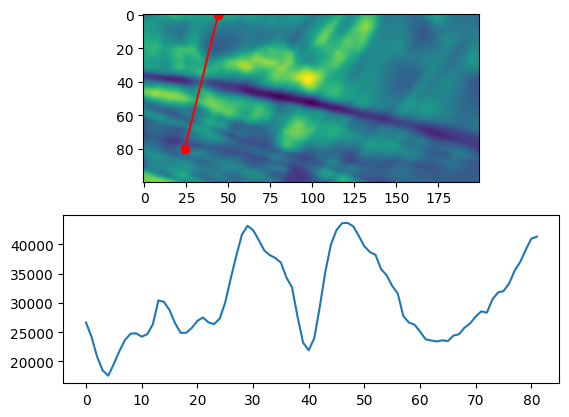

In [268]:
import scipy
# extract
framezoom = first_frame[1150:1250,700:900]
# in pixel coordinates
x0,y0 = 24,80
x1,y1 = 44,0
length = int(np.hypot(x1-x0,y1-y0))

x, y = np.linspace(x0, x1, length), np.linspace(y0, y1, length)

zi = framezoom[y.astype(int), x.astype(int)]

fig, axes = plt.subplots(nrows=2)
axes[0].imshow(framezoom)
axes[0].plot([x0, x1], [y0, y1], 'ro-')
axes[0].axis('image')

axes[1].plot(zi)

plt.show()

In [270]:
import skimage
profile = skimage.measure.profile_line(framezoom,[80,24],[0,44])

In [272]:
len(profile)

84

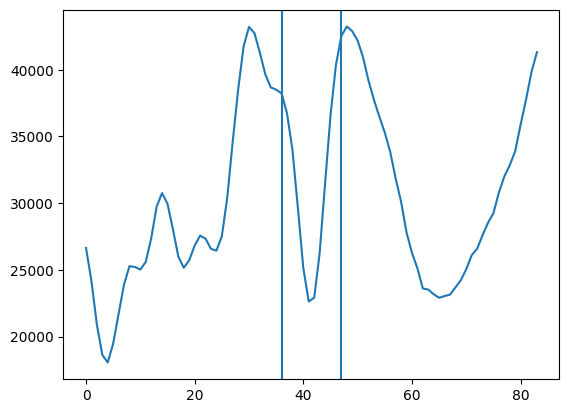

In [278]:
fig,ax=plt.subplots()
ax.plot(profile)
st= 36
end=47

ax.axvline(st)
ax.axvline(end)
plt.show()

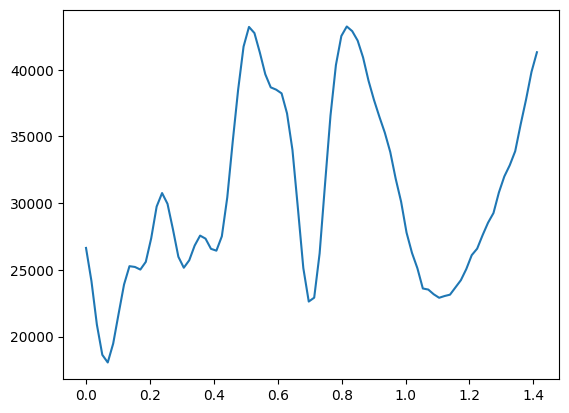

In [280]:
xdirection = np.arange(len(profile))*spatial_samp
fig,ax=plt.subplots()
ax.plot(xdirection,profile)
plt.show()

In [282]:
ynorm = [float(i)/max(profile[st:end])-1 for i in profile[st:end]]

g_init = models.Gaussian1D(amplitude=-1., mean=0.55, stddev=.1)
fit_g = fitting.LevMarLSQFitter()
gsmaller = fit_g(g_init, xdirection[st:end], ynorm)

In [284]:
gsmaller

<Gaussian1D(amplitude=-0.4519542, mean=0.70126687, stddev=0.03777027)>

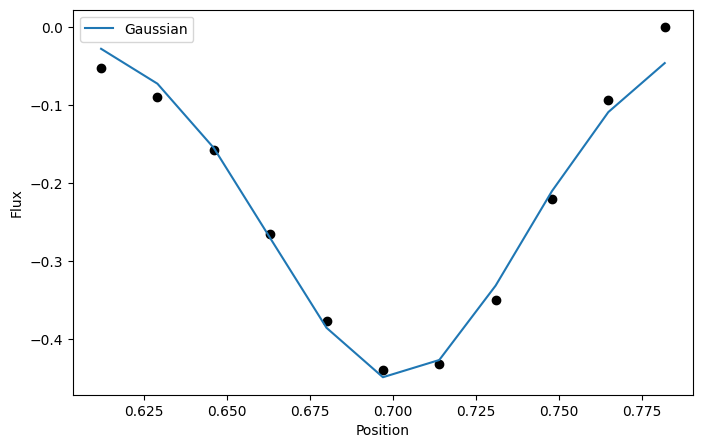

In [286]:
plt.figure(figsize=(8,5))
plt.plot(xdirection[st:end], ynorm, 'ko')
plt.plot(xdirection[st:end], gsmaller(xdirection[st:end]), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)
plt.show()

In [288]:
gsmaller.stddev*725

27.383447779089682

In [ ]:
# ok, so this gives us the intensities at each step along the line.  so we discretize and determine how many "pixels" (spatial sampling steps) each step along the line actually is.  Then can convert to km.

In [172]:
lengthabs = np.hypot(x1-x0,y1-y0)
length_arr = np.max([np.abs(y1-y0),np.abs(x1-x0)])
lengthabs/length_arr


1.0278162530335857

In [148]:
x[1]-x[0]

0.23456790123456983

In [150]:
y[1]-y[0]

-0.9876543209876587

In [154]:
np.sqrt((y[1]-y[0])**2+(x[1]-x[0])**2)

1.015127163489966

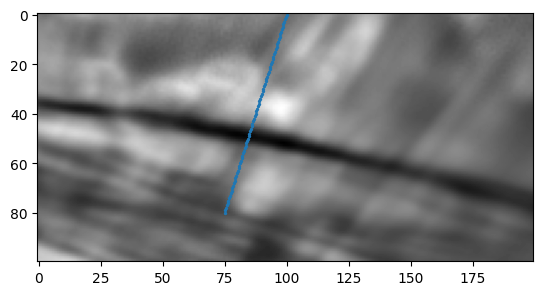

In [48]:
framesmall = first_frame[1150:1250,700:900]
fig,ax=plt.subplots()
ax.imshow(framesmall,cmap='grey')

#ax.scatter(np.linspace(200,325,200),np.linspace(100,300,200),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')
ax.scatter(np.linspace(75,100,81),np.linspace(80,0,81),2)

plt.show()

In [ ]:
xrange =  np.linspace(180,220,101)
yrange = np.linspace(215,115,101)
values = []
pixdist = []
lencut = np.sqrt(41**2+100**2)
for i in range(100):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,100)

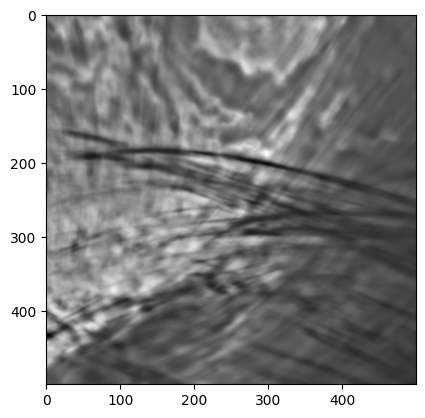

In [174]:
framesmall = first_frame[1000:1500,500:1000]
fig,ax=plt.subplots()
ax.imshow(framesmall,cmap='grey')

#ax.scatter(np.linspace(200,325,200),np.linspace(100,300,200),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')

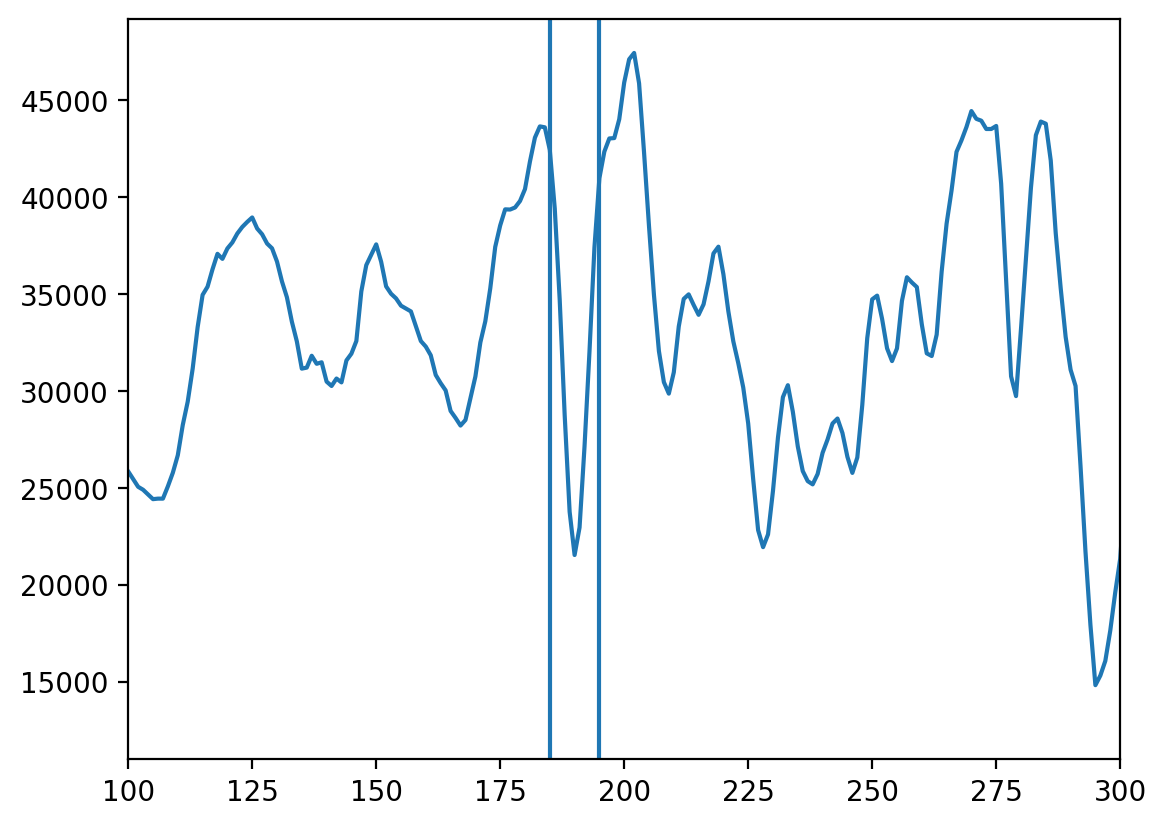

In [146]:
fig,ax=plt.subplots(dpi=200)
ax.plot(framesmall[:,235])
ax.set_xlim(100,300)
st=180
end=195

ax.axvline(st)
ax.axvline(end)

In [148]:
xdata = np.arange(len(framesmall[:,235]))
ydata = framesmall[:,235]

ynorm = [float(i)/max(ydata[st:end])-1 for i in ydata[st:end]]

g_init = models.Gaussian1D(amplitude=-1., mean=200, stddev=5)
fit_g = fitting.LevMarLSQFitter()
gsmaller = fit_g(g_init, xdata[st:end], ynorm)

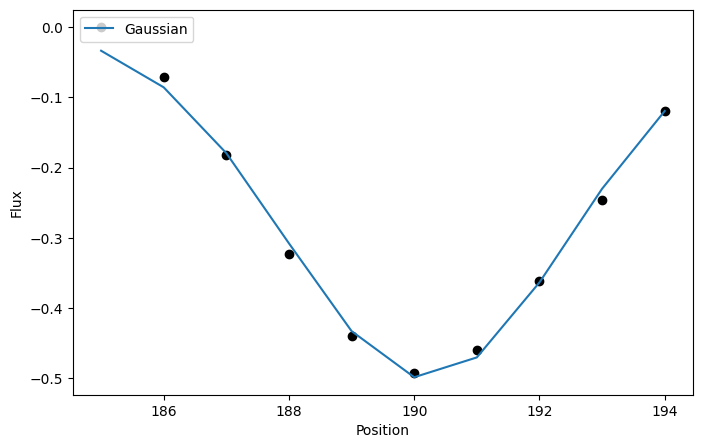

In [152]:
plt.figure(figsize=(8,5))
plt.plot(xdata[st:end], ynorm, 'ko')
plt.plot(xdata[st:end], gsmaller(xdata[st:end]), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [154]:
gsmaller.stddev*0.017*725

27.595120648495723

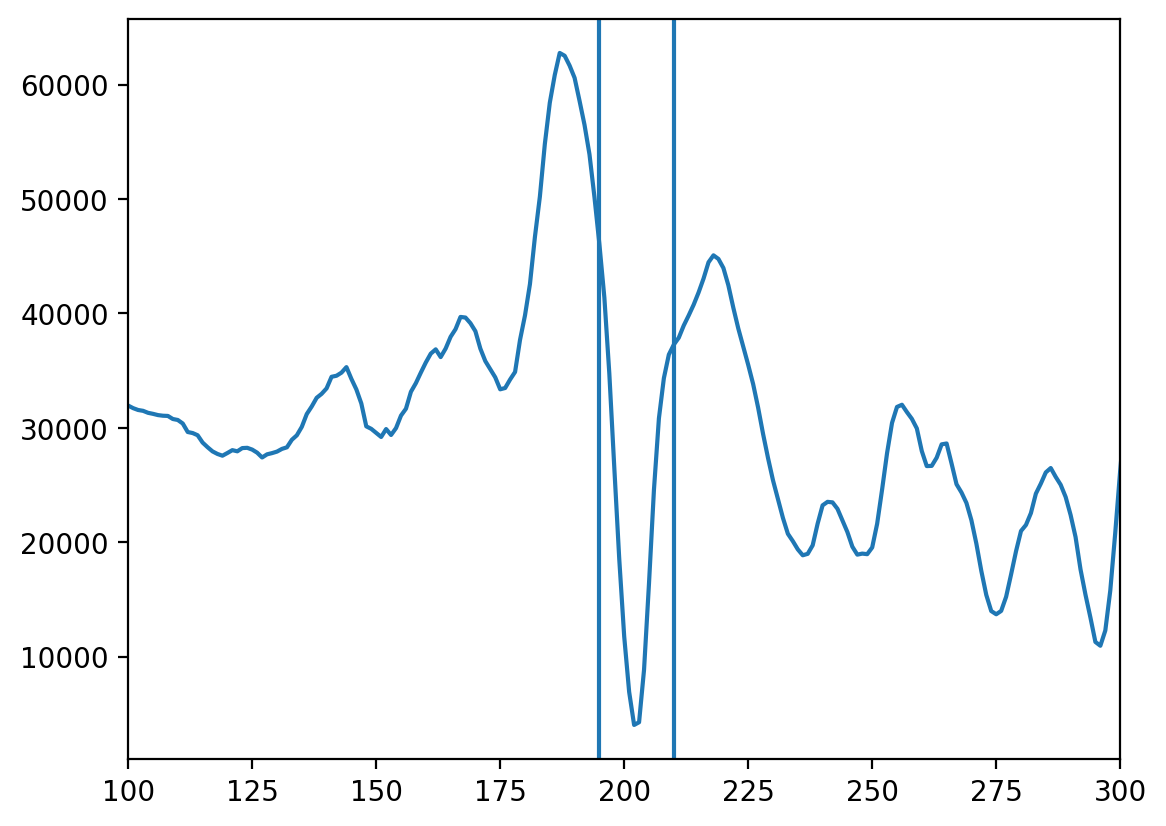

In [132]:
fig,ax=plt.subplots(dpi=200)
ax.plot(framesmall[:,300])
ax.set_xlim(100,300)
st = 195
end = 210
ax.axvline(st)
ax.axvline(end)

In [116]:
xdata = np.arange(len(framesmall[:,300]))
ydata = framesmall[:,300]

ynorm = [float(i)/max(ydata[st:end])-1 for i in ydata[st:end]]

g_init = models.Gaussian1D(amplitude=-1., mean=200, stddev=5)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata[st:end], ynorm)

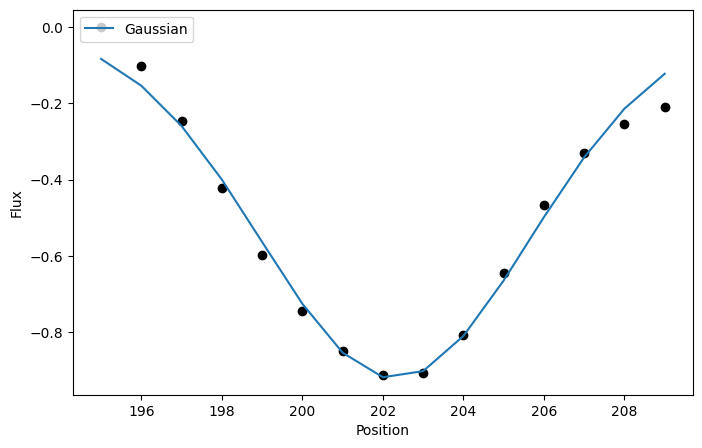

In [120]:
plt.figure(figsize=(8,5))
plt.plot(xdata[st:end], ynorm, 'ko')
plt.plot(xdata[st:end], g(xdata[st:end]), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [130]:
g.stddev*0.017*725

41.03690968751376

In [33]:
xrange =  np.linspace(300,400,100)
yrange = np.linspace(250,150,100)
values = []
pixdist = []
lencut = np.sqrt(100**2+100**2)
for i in range(100):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,100)

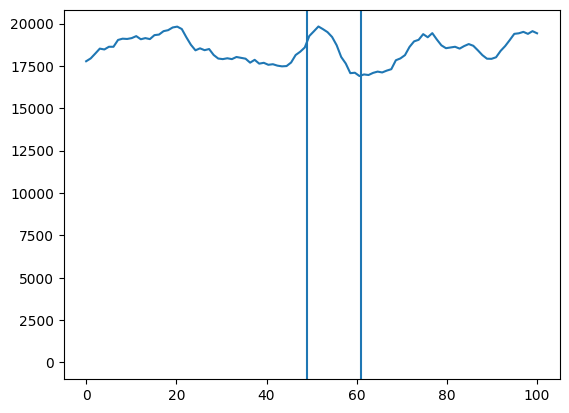

In [35]:
fig,ax=plt.subplots()
ax.plot(np.linspace(0,len(values),100),values,1)
st = 49
end = 61
ax.axvline(st)
ax.axvline(end)



In [246]:
covariance1

array([[ 7.57515393e+04, -6.99872558e+00,  2.81617482e+02,
        -6.88383155e+04],
       [-6.99872558e+00,  4.65976815e-01, -3.51712062e-02,
         8.08932447e+00],
       [ 2.81617482e+02, -3.51712062e-02,  2.55321425e+00,
        -4.19933152e+02],
       [-6.88383155e+04,  8.08932447e+00, -4.19933152e+02,
         8.52157019e+04]])

 MINIMA loc---> 64.20698246588744
FWHM = 84.39447535676669 +\- 1.5978780453903756 km


<>:18: SyntaxWarning: invalid escape sequence '\-'
<>:18: SyntaxWarning: invalid escape sequence '\-'
/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_39152/2051871811.py:18: SyntaxWarning: invalid escape sequence '\-'
  print('FWHM = {} +\- {} km'.format(size,error))


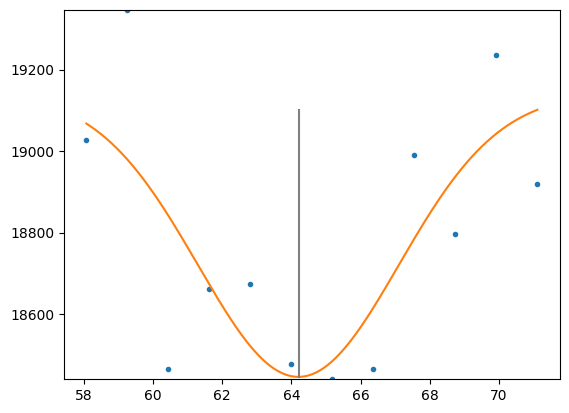

In [242]:
xdata = pixdist[st:end]
ydata = values[st:end]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,10,19000)
# g_init = models.Gaussian1D(amplitude=-1, mean=42, stddev=5)
# fit_g = fitting.LevMarLSQFitter()
# g = fit_g(g_init, xdata, ynorm)

#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
size = 0.017*727*fwhm
error = np.sqrt(covariance1[2,2])
print('FWHM = {} +\- {} km'.format(size,error))

In [17]:
# the following had been for first frame

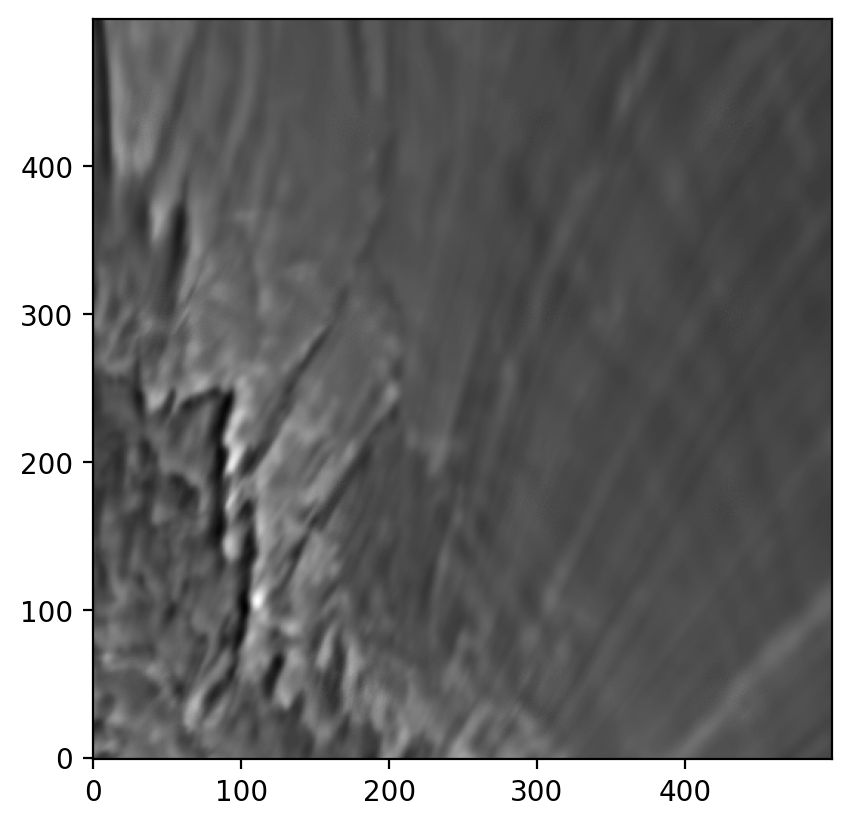

In [200]:
framesmall = img_file[1].data[0][2000:2500,2000:2500]
xrange =  np.linspace(50,150,101)
yrange = [150] * 101
fig,ax=plt.subplots(dpi=200)
ax.imshow(framesmall,cmap='grey')
ax.invert_yaxis()
# ax.scatter(xrange,yrange,s=1)

In [184]:
xrange =  np.linspace(50,150,101)
yrange = [150] * 101
values = []
pixdist = []
for i in range(101):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])
    pixdist.append(i*np.sqrt(2))


    

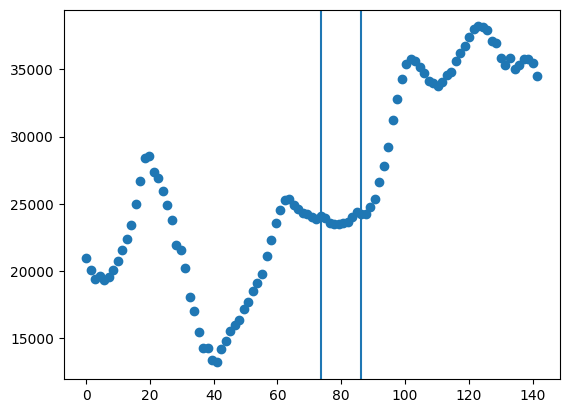

In [188]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)

ax.axvline(pixdist[st])
ax.axvline(pixdist[end])


In [168]:
xdata = pixdist[52:62]
ydata = values[52:62]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [(i-min(ydata))/(max(ydata)-min(ydata))-1 for i in ydata]

g_init = models.Gaussian1D(amplitude=1, mean=80, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)



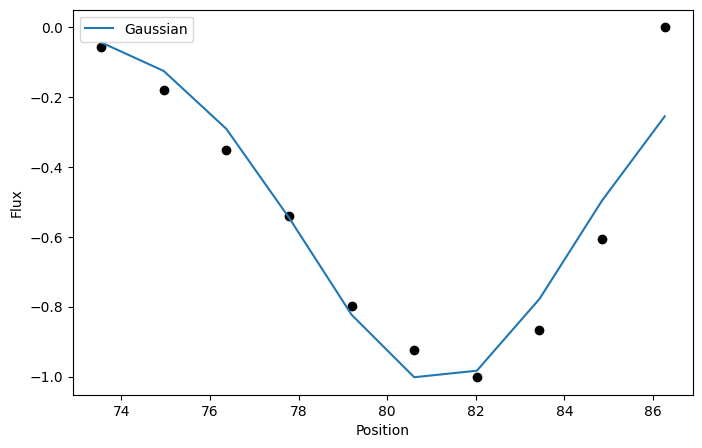

In [170]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [172]:
size = 0.017*727*g.fwhm
size

88.66171283723266

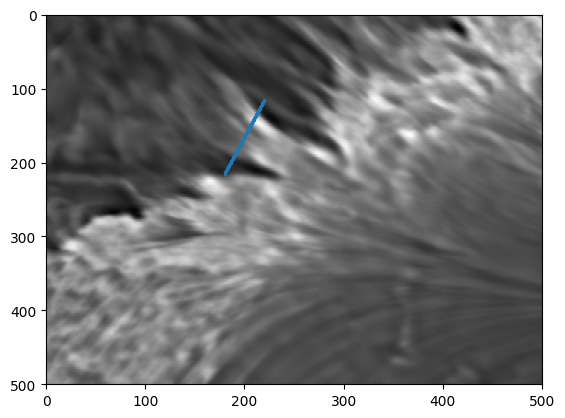

In [359]:
framesmall = img_file[1].data[0][500:1000,750:1250]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(180,220,101),np.linspace(215,115,101),2)

In [361]:
ax.scatter(np.linspace(180,220,101),np.linspace(215,115,101),2)
xrange =  np.linspace(180,220,101)
yrange = np.linspace(215,115,101)
values = []
pixdist = []
lencut = np.sqrt(41**2+100**2)
for i in range(100):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,100)



In [363]:
lencut

108.07867504739313

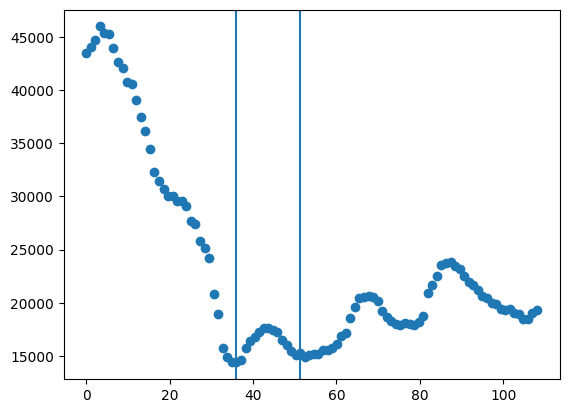

In [365]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[33])
ax.axvline(pixdist[47])

In [367]:
xdata = pixdist[33:47]
ydata = values[33:47]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=45, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

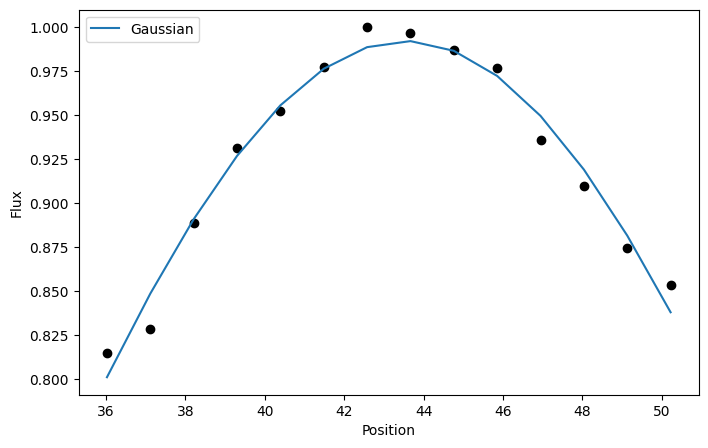

In [369]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [371]:
size = 0.017*727*g.fwhm
size

334.5064488220516

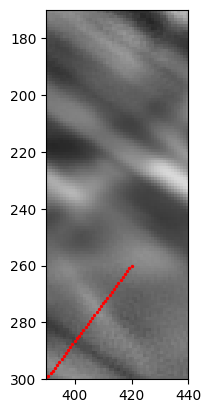

In [463]:
framesmall = img_file[1].data[0][1500:2000,1500:2000]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(390,420,40),np.linspace(300,260,40),2,c='red')
ax.set_xlim([390,440])
ax.set_ylim([300,170])
ax.set_aspect('equal')

In [473]:
xrange =  np.linspace(390,420,40)
yrange = np.linspace(300,260,40)
values = []
pixdist = []
lencut = np.sqrt(30**2+40**2)
for i in range(40):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,40)

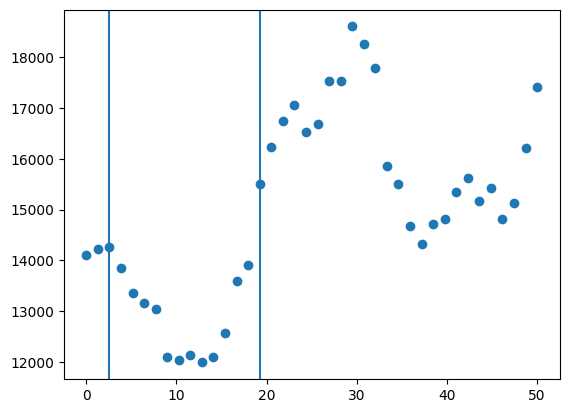

In [485]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[2])
ax.axvline(pixdist[15])


In [512]:
xdata = pixdist[2:15]
ydata = values[2:15]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]

g_init = models.Gaussian1D(amplitude=-1, mean=10, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

In [514]:
g

<Gaussian1D(amplitude=-0.16733153, mean=11.42850279, stddev=3.88484819)>

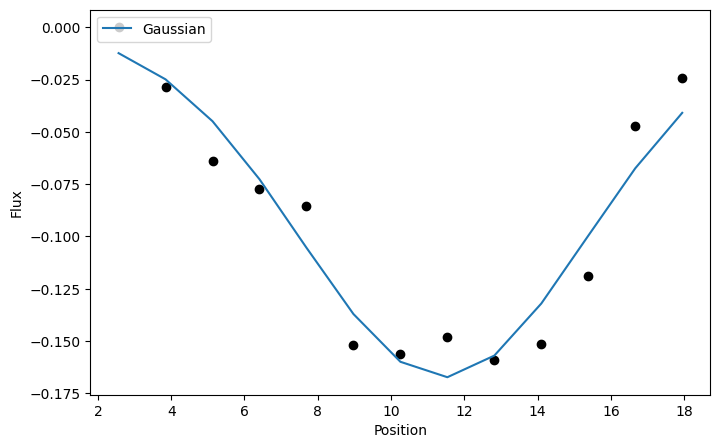

In [516]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [518]:
size = 0.017*727*g.fwhm
size

113.0615952446757

In [72]:
from scipy.optimize import curve_fit

In [96]:
def gaussian_for_calib(x, A, mu, sigma, baseline):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))+ baseline

def fitfeature(xdata, ydata, amp,sig,base,plot='True'):
	#Gaussian fit
	params, covariance = curve_fit(gaussian_for_calib, xdata, ydata, p0=[amp, np.mean(xdata), sig, base])
	a,b,c,d = params
	xfit  = np.linspace(xdata[0],xdata[-1], 1000)
	yfit = gaussian_for_calib(xfit, a,b,c,d)

	w0 = xfit[np.argmin(yfit)]
	print(' MINIMA loc--->',w0)
	
	if plot=='True':
		plt.plot(xdata, ydata, '.')
		plt.plot(xfit, yfit)
		plt.plot([w0,w0], [yfit.min()-0.1, yfit.max()], color='gray')
		plt.ylim(ydata.min()-0.03, ydata.max()+0.03)

	return xfit, yfit, params, covariance, w0

In [645]:
# this was for 16th frame

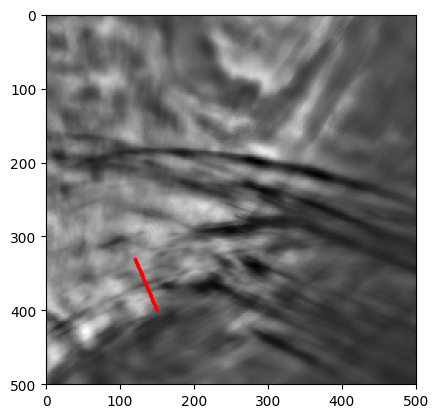

In [36]:
framesmall = img_file[1].data[0][1000:1500,500:1000]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(120,150,70),np.linspace(330,400,70),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')

In [38]:
xrange =  np.linspace(120,150,70)
yrange = np.linspace(330,400,70)
values = []
pixdist = []
lencut = np.sqrt(30**2+70**2)
for i in range(70):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,70)

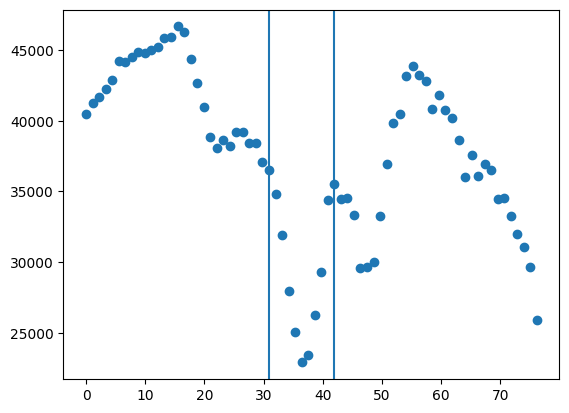

In [152]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[28])
ax.axvline(pixdist[38])

xdata = pixdist[23:39]
ydata = values[23:39]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,5,35000)
# g_init = models.Gaussian1D(amplitude=-1, mean=42, stddev=5)
# fit_g = fitting.LevMarLSQFitter()
# g = fit_g(g_init, xdata, ynorm)

#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
fwhm

 MINIMA loc---> 36.70499689878441


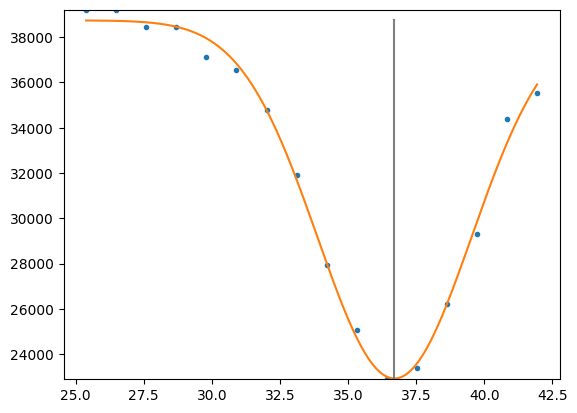

In [154]:
# using other method


6.646588678513535

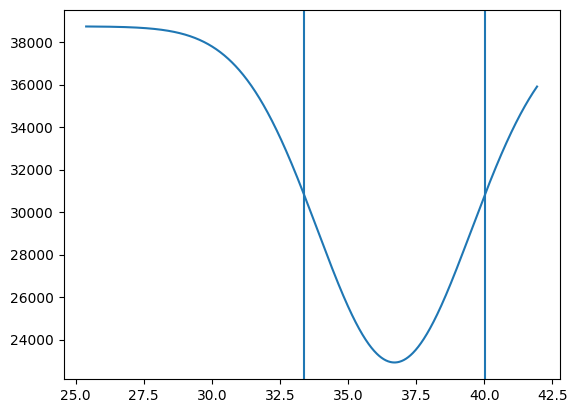

In [162]:
fig,ax=plt.subplots()
ax.plot(xfit1,yfit1)
ax.axvline(params1[1]-(fwhm/2))
ax.axvline(params1[1]+(fwhm/2))

In [158]:
size = 0.017*727*fwhm
size

82.14518947774879

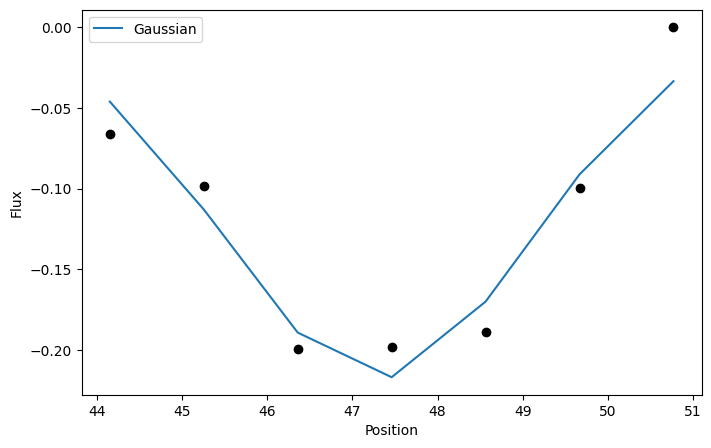

In [66]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [116]:
xdata = pixdist[40:47]
ydata = values[40:47]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]

g_init = models.Gaussian1D(amplitude=-1, mean=37, stddev=5)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

 MINIMA loc---> 47.25842927423407


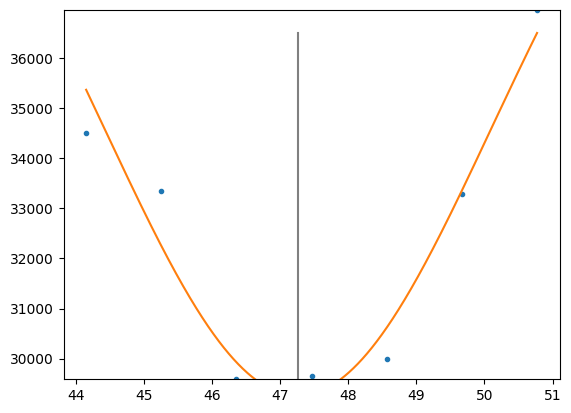

In [118]:
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,5,35000)

In [122]:
#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
fwhm
size = 0.017*727*fwhm
size

82.48541575522584

there we go. Errorbars? 

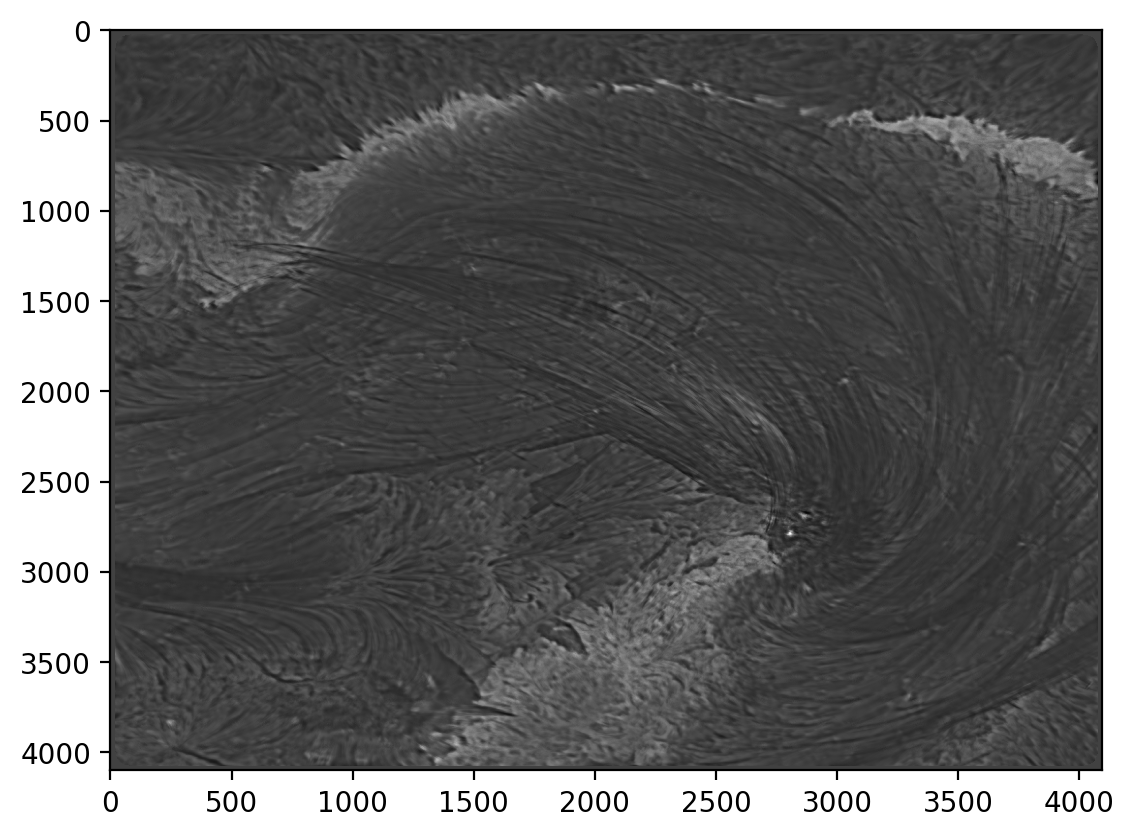

In [647]:
# ribbon finger

img_file = fits.open(path+folder_vbi+'/'+dir_list[15])
frame = img_file[1].data[0]
fig,ax=plt.subplots(dpi=200)
ax.pcolormesh(frame,cmap='grey')
ax.invert_yaxis()

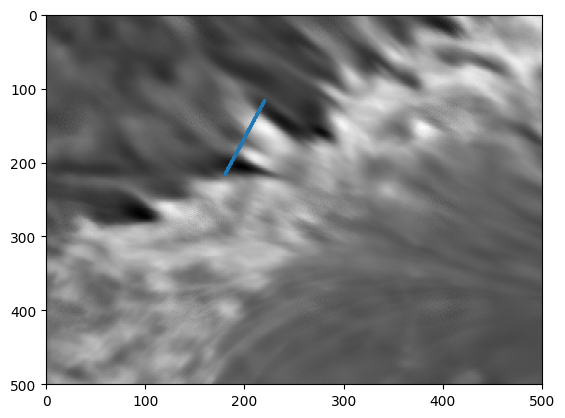

In [651]:
framesmall = img_file[1].data[0][500:1000,750:1250]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(180,220,101),np.linspace(215,115,101),2)

In [653]:
xrange =  np.linspace(180,220,101)
yrange = np.linspace(215,115,101)
values = []
pixdist = []
lencut = np.sqrt(41**2+100**2)
for i in range(100):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,100)

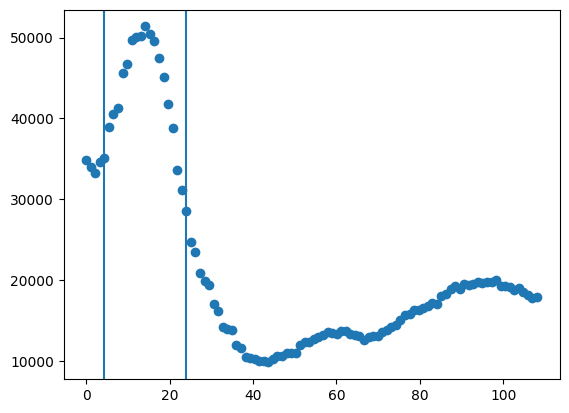

In [659]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[4])
ax.axvline(pixdist[22])

In [669]:
xdata = pixdist[4:22]
ydata = values[4:22]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=10, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

In [671]:
size = 0.017*727*g.fwhm
size

288.9681077474073

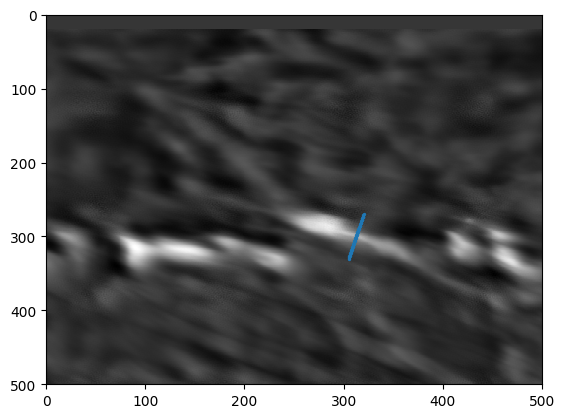

In [695]:
framesmall = img_file[1].data[0][0:500,2000:2500]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(305,320,60),np.linspace(330,270,60),2)

In [701]:
xrange =  np.linspace(305,320,60)
yrange = np.linspace(330,270,60)
values = []
pixdist = []
lencut = np.sqrt(15**2+60**2)
for i in range(60):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,60)

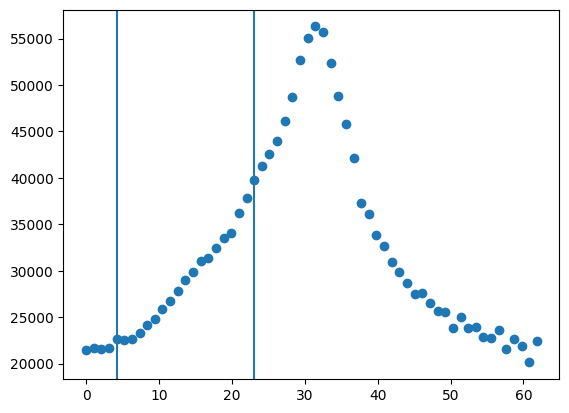

In [703]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)


In [709]:
xdata = pixdist
ydata = values

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=30, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

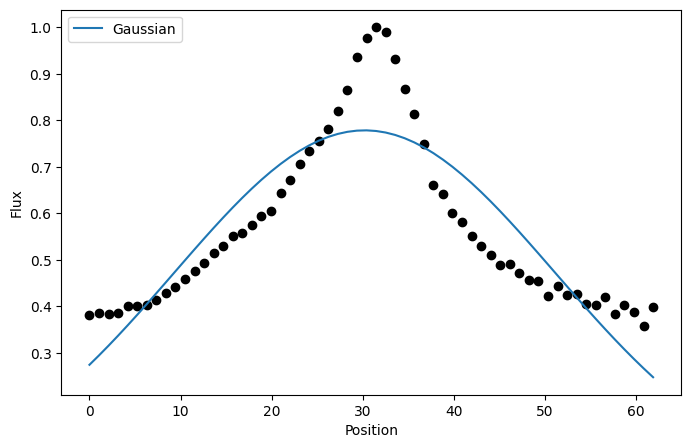

In [712]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

fwhm looks to be like 20 though